# Hayward Fault Sequence Simulator

### By Yair Franco
##### Started April 24, 2024

Note: this code requires Python v3.10.0 or higher to run

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Time Model

Based on Lienkaemper, 2010: https://doi.org/10.1785/0120090129

In [2]:
present = datetime.now().year #or a manual input to simulate what this code would do in the future

# dates = [1868, 1725, 1629, 1475, 1317, 1134, 957, 822, 660, 444, 247, 91]
# errors = [0, 38, 46, 47, 44, 77, 21, 40, 10, 42, 40, 40]

dates = [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]
errors = [40, 40, 42,10, 40, 21, 77, 44, 47, 46, 38, 0]

In [3]:
timeset = []

for i in range(len(dates)):
    r = [dates[i]-errors[i],dates[i],dates[i]+errors[i]]
    timeset.append(r)

print(timeset)

[[51, 91, 131], [207, 247, 287], [402, 444, 486], [650, 660, 670], [782, 822, 862], [936, 957, 978], [1057, 1134, 1211], [1273, 1317, 1361], [1428, 1475, 1522], [1583, 1629, 1675], [1687, 1725, 1763], [1868, 1868, 1868]]


### Create fake sequences to test

Values to test: 

Lienkaemper, 2010 gives RI of 161 and SD of 65

Parsons, 2008 (https://doi.org/10.1029/2008GL035887) gives an RI of 210 years and coeff. of var. 0.6 (SD = 126)

Parsons, 2012 (https://doi.org/10.1029/2012GL052275) gives an RI of 211, -SD = 95, +SD = 173

The following cell uses a purely random method for generating the following earthquake, using the error bounds input above. It does not take into account a presumed normal distribution (that comes later).

In [4]:
ri = 161
sd = 65

for i in range(10): #create x fake sequences
    startyear = dates[0] + np.random.randint(-errors[0],errors[0]) #use a random number to set the first event within its error bounds
    fakeseq = [startyear] 

    for j in range(len(dates)-1):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd) #create the rest of the fake events using the same random number method as the first
        fakeseq.append(nextevent)

    #print(fakeseq)
    print(f'Sequence {i+1} puts the 1868 earthquake in the year {fakeseq[-1]} instead.')

Sequence 1 puts the 1868 earthquake in the year 1845 instead.
Sequence 2 puts the 1868 earthquake in the year 2278 instead.
Sequence 3 puts the 1868 earthquake in the year 1776 instead.
Sequence 4 puts the 1868 earthquake in the year 1932 instead.
Sequence 5 puts the 1868 earthquake in the year 1918 instead.
Sequence 6 puts the 1868 earthquake in the year 1959 instead.
Sequence 7 puts the 1868 earthquake in the year 1833 instead.
Sequence 8 puts the 1868 earthquake in the year 1682 instead.
Sequence 9 puts the 1868 earthquake in the year 1870 instead.
Sequence 10 puts the 1868 earthquake in the year 1798 instead.


Let's count how long it takes for these fake sequences to place the 1868 earthquake on the correct year.

In [5]:
success = False
att = 0

while success == False:
    att += 1
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #print(fakeseq)
    success = fakeseq[-2] == dates[-1] #true or false: is the 12th generated earthquake in 1868?

print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}')
print(f'Lienkaemper sequence: {dates}')

It took 159 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 2066
Successful sequence: [125, 241, 383, 608, 759, 896, 1088, 1289, 1428, 1543, 1767, 1868, 2066]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


Let's add another constraint: the 13th earthquake generated should be after the present (since there hasn't been one since 1868).

In [6]:
ri = 161
sd = 65
success = False
att = 0

while success == False:
    att += 1
    #print(att)
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #if fakeseq[-2] == dates[0] or fakeseq[-1] == present: print(fakeseq[-2],fakeseq[-1])

    if fakeseq[-2] == dates[-1] and fakeseq[-1] > present:
        success = True



print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}') 
print(f'Lienkaemper sequence: {dates}')

It took 899 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 2069
Successful sequence: [114, 210, 356, 536, 643, 839, 1023, 1177, 1381, 1560, 1749, 1868, 2069]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


This function returns the recurrence intervals for any given sequence. It'll be useful later

In [8]:
def calcRI(seq,getMean=0): #setting getMean to 1 will calculate RI mean and sd for the given sequence
    ri = []

    for i in range(len(seq)-1):
        interval = seq[i+1] - seq[i]
        ri.append(interval)

    # match getMean:
    #     case 0:
    #         return ri

    #     case 1:
    #         mean = int(np.mean(ri))
    #         sd = int(np.std(ri))
    #         return ri, mean, sd
        
    if getMean == 0: #for python versions older than 3.10, replace 'match' code with this
        return ri
    elif getMean == 1:
        mean = int(np.mean(ri))
        sd = int(np.std(ri))
        return ri, mean, sd

### Normal distributions

Now let's use Numpy's Gaussian RNG to favor the mean Lienkaemper dates, instead of using the average RI for the whole sequence. Additionally, let's consider all sequences placing the next earthquake before today as fails (since the next earthquake has not happened yet).

Obviously, this will always return a sequence with an earthquake in 1868, since we know this event's exact date. The generator should "succeed" at the first try.

Since we do not know when the next earthquake will happen, we'll use the calculate the mean and SD of the RIs for our generated sequence, and make a guess based on the results.

In [10]:
success = False
att = 0

while success == False:
    att += 1
    seq = []

    for j in range(len(dates)):
        event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
        seq.append(event)

    mean, sd = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence
    nextevent = seq[-1] + int(np.random.normal(mean, sd)) #generate theoretical next earthquake
    seq.append(nextevent)

    if seq[-1] > present:
        success = True #is the 12th generated earthquake in 1868? Is the next one in the future?

print(f'Attempt count: {att}')
print(f'This sequence places the next Hayward earthquake in the year {seq[-1]}')
print(f'This sequence: {seq}')
print(f'Lienkaemper sequence: {dates}')

Attempt count: 1
This sequence places the next Hayward earthquake in the year 2075
This sequence: [99, 237, 578, 667, 852, 942, 1043, 1372, 1528, 1683, 1698, 1868, 2075]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


Let's repeat this thousands of times!

In [11]:
nextdates = []
s = 0
sequences = 100000
means = []
sds = []
sq = []

for i in range(sequences): #initialize sequences
    success = False
    att = 0

    while success == False:
        att += 1
        seq = []

        for j in range(len(dates)-1):
            add = False

            if j == 0: #set first event. No need for it to have certain bounds
                event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
            elif j > 0:
                while add == False:
                    event = int(np.random.normal(dates[j],errors[j]))
                    # print(f'Adding event {j}: Year {event} Previous = {seq[j-1]} Fail? {event < seq[-1]}')
                    if event < seq[j-1]: #avoids events happening before the previous ones
                        continue
                    elif event >= seq[j-1]:
                        add = True
            seq.append(event)

        seq.append(dates[-1]) #add 1686 earthquake manually

        meanRI, sdRI = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence

        # means.append(mean)
        # sds.append(sd)
        add = False
        while add == False:
            nextevent = seq[-1] + int(np.random.normal(meanRI, sdRI))
            if nextevent < seq[-1]:
                continue
            elif nextevent >= seq[j-1]:
                add = True
                
        seq.append(nextevent)

        sq.append(seq)
        nextdates.append(seq[-1])
        success = True

print(nextdates[-1])

2058


Let's visualize the sequences we've generated. They should look somewhat like a figure in Lienkaemper, 2010.

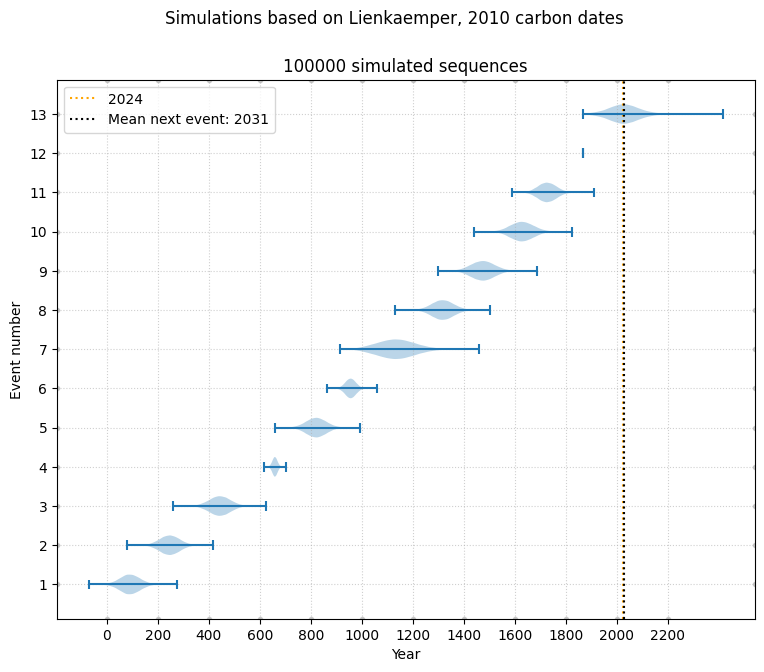

In [12]:
x = np.arange(1,len(seq)+1,1)

fig, ax = plt.subplots(figsize=(9,7))

fig.suptitle(f'Simulations based on Lienkaemper, 2010 carbon dates')

ax.set_title(f"{len(sq)} simulated sequences")
ax.set_ylabel(f"Event number")
ax.set_xlabel(f'Year')
ax.set_yticks(x)
ax.set_xticks(np.arange(0,2400,200))
ax.axvline(2024,linestyle=':',color='orange',label='2024')
ax.axvline(np.mean(nextdates),linestyle=':',color='black',label=f'Mean next event: {round(np.mean(nextdates))}')


by_event = []
for i in range(len(x)):
    by_event.append([ev[i] for ev in sq])

ax.violinplot(by_event,vert=False)
ax.grid(alpha=0.6,marker='.',ls=':')
ax.legend(loc=2)

plt.show()

Just for fun, let's make a histogram of the years this simulation gives for the next earthquake.

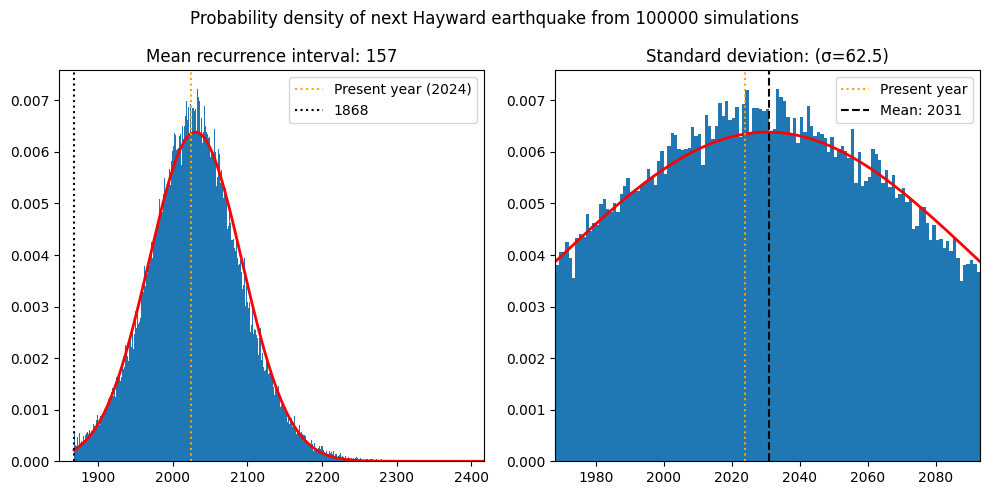

In [19]:
h = np.array([x[-1] for x in sq])
binsize = max(h) - min(h)
sigma = np.std(h)
mu = np.mean(h)

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))

fig.suptitle(f'Probability density of next Hayward earthquake from {len(h)} simulations')

count, bins, ignored = ax[0].hist(h, binsize, density=True) #plot main hist
gauss = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp((-1/2)*((bins-mu)/sigma)**2)

ax[0].set_title(f"Mean recurrence interval: {meanRI}")
ax[1].set_title(f"Standard deviation: (σ={round(sigma,1)})")

ax[0].plot(bins, gauss,
         linewidth=2, color='r')

ax[0].set_xlim(min(h)-20,max(h))
ax[0].axvline(present,linestyle=':',color='orange',label=f'Present year ({present})')
ax[0].axvline(1868,linestyle=':',color='black',label='1868')
ax[0].legend()


ax[1].hist(h, binsize, density=True) #plot sub hist
ax[1].plot(bins, gauss,
         linewidth=2, color='r')

ax[1].axvline(present,linestyle=':',color='orange',label=f'Present year')
ax[1].axvline(round(mu),linestyle='--',color='black',label=f'Mean: {round(mu)}')

ax[1].set_xlim(mu-sigma,mu+sigma)
ax[1].legend()
#ax[1].set_xlim(2000,2100)

plt.show()

We know this works, so let's recreate Parsons, 2008.

Base steps:

1. A free event takes place before the first earthquake as a nucleation point for the sequence, and any number of events may happen 500 years before the first actual event. These are not included in the count
2. The next event is determined by a predetermined RI and coefficient of variation, which are the parameters being tested
3. Only sequences where all events land within the given constraints are considered successes

In [49]:
nextdates = []
means = []
sds = []
sqlist = []
matchlist = []
seedlist = []
s = 0

testRI = 160
testCV = 0.2
testSD = testRI * testCV

run_start = datetime.now()
print(f'Testing: mean = {testRI}, SD = {testSD}. It is currently {run_start} (local time)')

runs = 10000000
for h in range(runs):
    if h%(runs//10) == 0:
        print(f'Attempts made: {h}')
    seq = []
    event = dates[0] - 500 #free period where sequence can have any number of earthquakes
    seeds = 0 #seed events are fake earthquakes we will ignore later, they just provide a starting point for the sequence

#instead of slowly allowing to keep generating, just create the sequence and COMPARE to the timeset to decide whether to keep it or not
    #TODO: optimize - this while loop can probably be rewritten much more simply with one if statement that only passes if successful (look at the while loop for 'nextevent')
    #as of now, both of these loops run at around the same speed at 10 million runs. It might be possible to optimize further.

    #loop 1
    # while True:
    #     interval = int(np.random.normal(testRI,testSD))
    #     if interval <= 0:
    #         continue
    #     if event + interval > dates[-1]:
    #         break
    #     event += interval
    #     seq.append(event)

    #loop 2
    while True:
        try:
            interval = int(np.random.normal(testRI,testSD))
            if interval <= 0: #this prevents negative intervals. For further realism, this number could be raised to an arbitrary level (e.g. 20 years) since large earthquakes do not follow each other very quickly
                raise Exception
            
            if event + interval > dates[-1]: #end sequence at or before 1868
                break

            event += interval #next event year
            seq.append(event)

        except:
            continue
    #end of loop 2

    if dates[-1] not in seq: #a successful list must contain 1868, so this saves time
        continue

    #we have a contender list at this point
    print(f'Testing sequence: {seq}')
    
    matches = 0
    disq = False
    matched_events = []

    for i, d in enumerate(seq):

        if disq == True:
            break
        #print(f'analyzing event {i} year {d}')

        for j in range(len(timeset)):
            if d < timeset[0][0]:
                seeds += 1
                # print(f'event precedes set. Next')
                break
            if d >= timeset[j][0] and d <= timeset[j][2] or d == timeset[j][1]: #if date is within any of the bounds or equals the exact mean
                if j in matched_events: #if more than one date within a window is found, the sequence fails
                    # print(f'Duplicate found: {d} also within bounds of {j}. Break everything')
                    disq = True
                    break
                matches += 1
                matched_events.append(j)
                # print(f'found a match: fake event {d} within bounds of real event {j}. Next')
                break
            if d > timeset[j][2] and d < timeset[j+1][0]: #if any date is outside the error bounds the sequence is automatically disqualified
                # print(f'date {d} found between {timeset[j][2]} and {timeset[j+1][0]}. Disqualified! Break everything')
                disq = True
                matches -= 1
                break

    matchlist.append(matches)
    if matches == len(timeset):
        print(f'sequence {seq} valid. Attempt {h+1}. Matches: {matches}/{len(timeset)}. Added to list')
        seedlist.append(seeds)
    elif disq == True or matches != len(timeset):
        # print(f'sequence {seq} failed. Matches: {matches}/{len(timeset)}; {matched_events}. Retrying')
        continue


        # seq.append(dates[-1]) #add 1686 earthquake manually

    meanRI, sdRI = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence

    # means.append(mean)
    # sds.append(sd)
    add = False
    while not add:
        nextevent = seq[-1] + int(np.random.normal(testRI, testSD)) #calculate new event given this sequence's mean and SD
        if nextevent < seq[-1]:
            continue
        add = True
            
    seq.append(nextevent)

    sqlist.append(seq)
    nextdates.append(seq[-1])

run_end = datetime.now()
print(f'Processing finished! Runtime: {run_end - run_start}')
print(f'{h+1} attempts. Successes: {len(sqlist)}')
print(f'seedlist: {seedlist}')
print(f'sequences: {sqlist}')


Testing: mean = 160, SD = 32.0. It is currently 2024-08-22 15:29:10.850681 (local time)
Attempts made: 0
sequence [-164, -54, 93, 287, 463, 654, 814, 952, 1147, 1308, 1496, 1595, 1735, 1868] valid. Attempt 112589. Matches: 12/12. Added to list
sequence [-231, -97, 94, 229, 445, 661, 813, 944, 1160, 1317, 1450, 1595, 1699, 1868] valid. Attempt 684024. Matches: 12/12. Added to list
Attempts made: 1000000
Attempts made: 2000000
sequence [-274, -96, 68, 260, 453, 650, 794, 972, 1109, 1285, 1459, 1610, 1688, 1868] valid. Attempt 2935619. Matches: 12/12. Added to list
Attempts made: 3000000
sequence [-256, -86, 72, 273, 473, 661, 842, 965, 1084, 1287, 1466, 1584, 1739, 1868] valid. Attempt 3164213. Matches: 12/12. Added to list
Attempts made: 4000000
Attempts made: 5000000
sequence [-233, -71, 120, 259, 414, 652, 822, 957, 1115, 1319, 1492, 1620, 1731, 1868] valid. Attempt 5127307. Matches: 12/12. Added to list
sequence [-251, -71, 78, 231, 443, 669, 782, 942, 1090, 1282, 1442, 1604, 1740, 1

### Next steps:

Do as Parsons: create 15 million sequences for each parameter interval (e.g. recurrence intervals in 10 year increments, and all possible standard deviations for each tested recurrence interval. In other words, for an RI of 150 years, test with an coeff. of variation of 0.05, 0.10, 0.15... and repeat for 160 years, then 170 years, and so on). The results should give a matrix of matches that can be plotted as a heatmap as in figure 4 of Parsons, 2008. This may take a while to run so make optimizations to this code if you can.

We are testing the hypothesis that the heatmap will look slightly different since it has been 16 years since that paper was published, which is a statistically significant amount of time.

When analyzing the sequences, remember to remove the "seed" events using the 'seedlist'.

Good luck!